In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
import matplotlib
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

In [66]:
busan = pd.read_csv('./부산광역시_지표.csv')
busan

,id,군구,면적(km²),공공체육시설,초등학교,지방세 징수(백만원),의료기관,저소득층(가구),저소득층(인구),세대수,...,외국인(남),외국인(여),출생(명),사망(명),혼인(건),이혼(건),범죄발생,흉악범죄,폭력범죄,CCTV수
0,1,중구,2.83,17,4,"100,363",141,139,280,"23,160",...,"1,347",815,112,409,163,91,5553,93,674,376
1,2,서구,13.98,74,11,"73,444",148,672,1281,"52,786",...,"1,314",807,386,999,391,227,3979,58,466,376
2,3,동구,9.87,65,7,"119,496",172,532,1129,"44,657",...,"1,089","1,223",334,848,369,188,5899,89,781,649
3,4,영도구,14.20,52,14,"63,242",146,667,1289,"54,859",...,"1,177",740,346,1158,366,259,3534,54,569,501
4,5,부산진구,29.67,225,32,"343,404",799,1176,2402,"166,865",...,"1,275","1,889",1695,2450,1475,684,17066,469,2748,1005
5,6,동래구,16.63,36,22,"227,601",469,784,1530,"112,136",...,427,826,1291,1538,1058,498,8381,137,1193,687
6,7,남구,26.82,74,21,"232,160",355,720,1392,"117,397",...,"3,148","3,224",1203,1726,1045,502,8431,138,1046,3171
7,8,북구,39.37,67,27,"130,947",360,1220,2602,"120,273",...,"1,220","1,352",1468,1704,1084,538,8106,126,1342,661
8,9,해운대구,51.47,117,32,"449,970",654,1406,2881,"168,650",...,"2,539","2,652",1948,2335,1471,724,14386,267,1732,570
9,10,사하구,41.77,59,26,"203,760",416,1366,2859,"138,790",...,"2,998","1,949",1526,2093,1337,761,8826,176,1222,1801


In [67]:
busan.columns

Index(['id', '군구', '면적(km²)', '공공체육시설', '초등학교', '지방세 징수(백만원)', '의료기관',
       '저소득층(가구)', '저소득층(인구)', '세대수', '한국인(남)', '한국인(여)', '외국인(남)', '외국인(여)',
       '출생(명)', '사망(명)', '혼인(건)', '이혼(건)', '범죄발생', '흉악범죄', '폭력범죄', 'CCTV수'],
      dtype='object')

In [68]:
busan['지방세 징수(백만원)'] = pd.to_numeric(busan['지방세 징수(백만원)'].str.replace(',', ''))
busan['세대수'] = pd.to_numeric(busan['세대수'].str.replace(',', ''))
busan['한국인(남)'] = pd.to_numeric(busan['한국인(남)'].str.replace(',', ''))
busan['한국인(여)'] = pd.to_numeric(busan['한국인(여)'].str.replace(',', ''))
busan['외국인(남)'] = pd.to_numeric(busan['외국인(남)'].str.replace(',', ''))
busan['외국인(여)'] = pd.to_numeric(busan['외국인(여)'].str.replace(',', ''))

In [69]:
busan['인구'] = busan['한국인(남)'] + busan['한국인(여)'] + busan['외국인(남)'] + busan['외국인(여)']

In [70]:
busan['강력범죄'] = busan['흉악범죄'] + busan['폭력범죄']

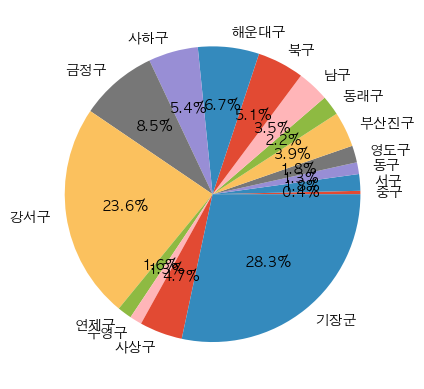

In [71]:
plt.pie(busan['면적(km²)'], labels=busan['군구'], autopct='%.1f%%')
plt.show()

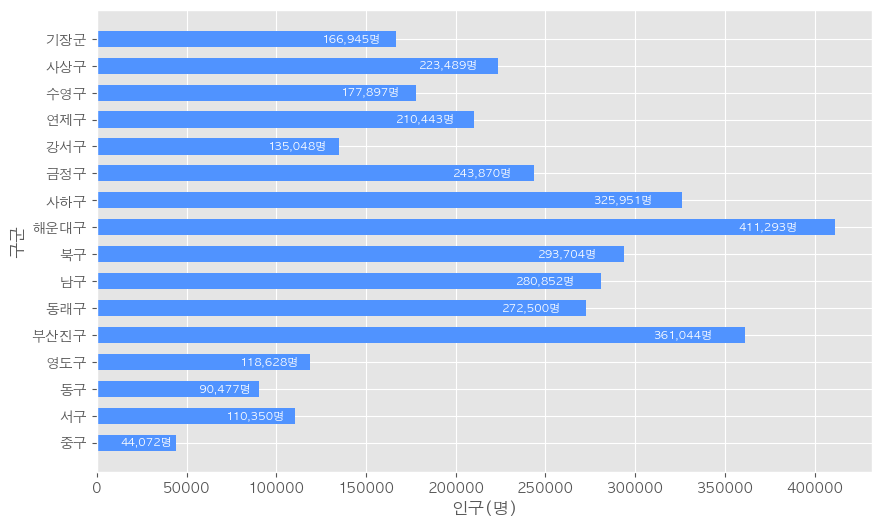

In [121]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
rects = plt.barh(busan.군구, busan.인구, height=0.6, color='#5093FF')

for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(format(rect.get_width(),','))+'명', ha='right', va='center', size=8, color='#FFFFFF')

plt.ylabel('구군')
plt.xlabel('인구(명)')
plt.show()

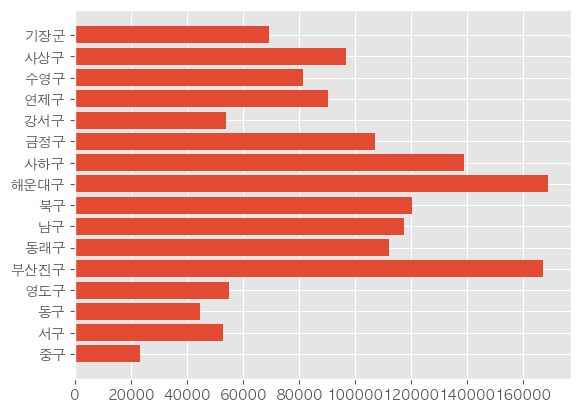

In [73]:
plt.barh(busan.군구, busan.세대수)
plt.show()

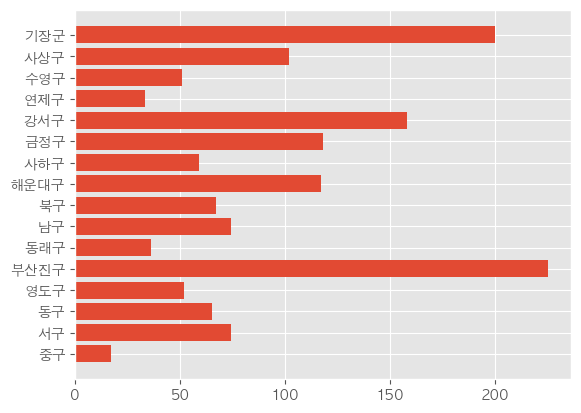

In [74]:
plt.barh(busan.군구, busan.공공체육시설)
plt.show()